# Replicación del artículo
Como es mencionado en:
```
@book{CastellanosN2003,
   author = {Nazareth P. Castellanos and Francisco B. Rodríguez and Pablo Varona},
   doi = {10.1007/3-540-44868-3_5},
   pages = {32-39},
   title = {Stochastic Networks with Subthreshold Oscillations and Spiking Activity},
   url = {http://link.springer.com/10.1007/3-540-44868-3_5},
   year = {2003},
}
```

Especificaremos cada caso de inicialización descrito en el artículo anterior para replicar sus resultados.

También mostraremos algunas imágenes para ver cuál sería el comportamiento descrito en el artículo. En estas imágenes:
- Los colores del mapa de calor serán azules para denotar **actividad sobre el umbral (spiking)** (cuanto más oscuro mayor potencial de membrana). Esto quiere decir que $a_i(t)$ se encuentra en el rango $(L, 3 \times L]$ y rojo para denotar **actividad subumbral** (cuanto más oscuro menor potencial de membrana) donde $a_i(t)$ se encontrará en el rango $[0, L]$.
- Las series temporales corresponderán con el potencial de membrana ($a_i(t)$) de una neurona específica de la rejilla.

## Workspace

In [1]:
from utils.initialization import set_all_cells
from utils.initialization_functions import dict_init_fn
from utils.stimulation import create_cluster_with_dict
from utils.ParameterEnum import ParameterEnum
from utils.plot_utils import generate_gif_sequence,\
    generate_heatmap_t, plot_grid_cells
from utils.rw_utils import random_walk, SUBTHRESHOLD
import numpy as np
import random
import matplotlib.pyplot as plt


STEPS = 2000
RESULTS_DIR = 'results/'
random.seed(101)


In [2]:
%load_ext autoreload
%autoreload 2

## Valores comúnes
Aquí describiremos propiedades comúnes de todos los escenarios de inicialización.
- Rejilla bi-dimensional de $50 \times 50$ neuronas.
- Cada neurona será conectada a las cuatro vecinas más cercanas.
- Todos los valores de conductancia $g$ serán el mismo (`G_1 = G_2 = G_3 = G_4`).

## Neuronas aisladas
Aquí replicaremos los comportamientos de una única neurona aislada que es descrita en la `Figure 2` del paper mencionado al principio del librillo.

<center>
    <img src="imgs/CastellanosN2003%20-%20Isolated%20neuron%20behaviours.png" width="500" height="300">
</center>

Para hacer esto asignaremos los siguientes parámetros comúnes:

In [3]:
a_ini = a_old = 0
p = 0.7
L = 30
C_p = 1
L_spike = 3 * L
C_spike = L
C_no_spike = L/5

common_values_dict = {
    ParameterEnum.A_T.name: a_ini,  # 0
    ParameterEnum.A_T_OLD.name: a_old,  # 1
    ParameterEnum.P.name: p,  # 2
    ParameterEnum.G_1.name: 0,  # 4
    ParameterEnum.G_2.name: 0,  # 5
    ParameterEnum.G_3.name: 0,  # 6
    ParameterEnum.G_4.name: 0,  # 7
    ParameterEnum.C_P.name: C_p,  # 8
    ParameterEnum.L.name: L,  # 9
    ParameterEnum.L_SPIKE.name: L_spike,  # 10
    ParameterEnum.C_SPIKE.name: C_spike,  # 11
    ParameterEnum.C_NO_SPIKE.name: C_no_spike,  # 12
    ParameterEnum.STAT.name: SUBTHRESHOLD  # 13
}

grid = np.zeros((1, 1, len(ParameterEnum)))


### Primer gráfico
Aquí asignaremos un $p_f = 0.9$

> **Observaciones**
>
> Podemos observar como la neurona simulada dispara con muy alta probabilidad al llegar al umbral $L$.

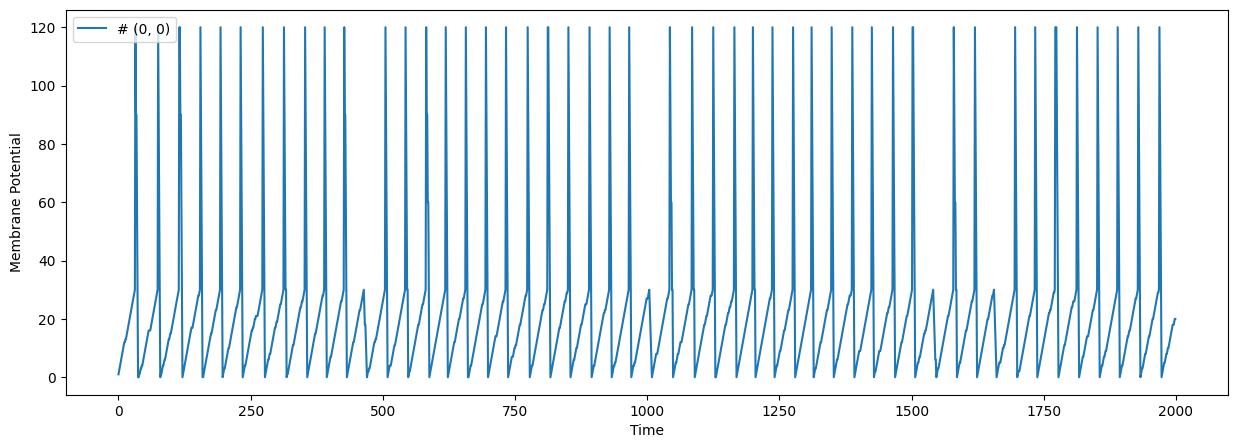

In [4]:
p_f = 0.9
common_values_dict[ParameterEnum.P_F.name] = 1 - p_f
grid = set_all_cells(
    grid, dict_init_fn, _dict=common_values_dict)

grid_isolated_first_sim = random_walk(grid, STEPS)
plot_grid_cells(
    grid_isolated_first_sim, [(0, 0)], ['-'])


### Segundo gráfico
Aquí asignaremos un $p_f = 0.5$

> **Observaciones**
>
> En comparación con el [primer gráfico](#primer-gráfico), la probabilidad de disparo se ha reducido a 0.5 por lo que vemos una distribución de disparos y no disparos uniforme.



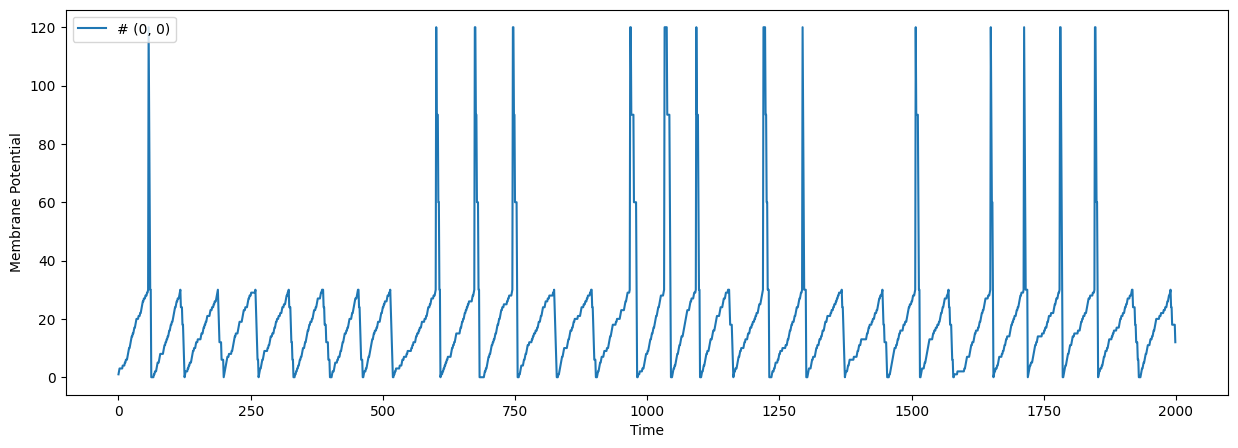

In [5]:
p_f = 0.5
common_values_dict[ParameterEnum.P_F.name] = 1 - p_f
grid = set_all_cells(
    grid, dict_init_fn, _dict=common_values_dict)

grid_isolated_first_sim = random_walk(grid, STEPS)
plot_grid_cells(
    grid_isolated_first_sim, [(0, 0)], ['-'])


### Tercer gráfico
Aquí asignaremos un $p_f = 0.1$

> **Observaciones**
>
> En comparación con los gráficos anteriores podemos observar cómo, la mayor parte del tiempo, la neurona mantiene una actividad subumbral y dispara con muy poca frecuencia.



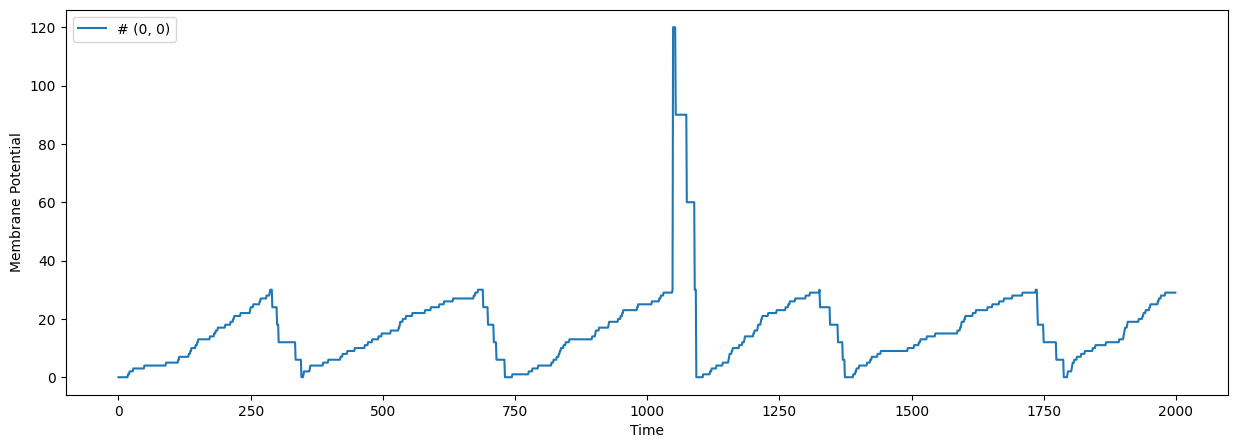

In [6]:
p_f = 0.1
common_values_dict[ParameterEnum.P_F.name] = 1 - p_f
grid = set_all_cells(
    grid, dict_init_fn, _dict=common_values_dict)

grid_isolated_first_sim = random_walk(grid, STEPS)
plot_grid_cells(
    grid_isolated_first_sim, [(0, 0)], ['-'])


## Rejilla de neuronas
Aquí replicaremos el comportamiento de una rejilla de neuronas que es descrita en el paper mencionado al comienzo del librillo, específicamente en las figuras `Figure 3` & `Figure 4` mostradas más abajo.

<div style="text-align:center">
  <img src="imgs/CastellanosN2003%20-%20Subthreshold%20oscillation%20and%20spiking%20activity%20for%20three%20neurons%20in%20a%20population%20of%2050x50%20units.png" style="display:inline-block;margin-right:5%" height="200px" width="300px">
  <img src="imgs/CastellanosN2003%20-%20Spatio-temporal%20patterns%20displayed%20by%20the%20networks%20of%2050x50%20neurons.png" style="display:inline-block" height="200px" width="300px">
</div>

Para hacer esto asignaremos una serie de parámetros comúnes:

In [7]:
grid_dim = (50, 50, len(ParameterEnum))
grid = np.zeros(grid_dim)

a_ini = a_old = 0
p = 0.9
p_f = 0.4
C_p = 1
L = 30
L_spike = 3 * L
C_spike = L
C_no_spike = L/5

common_values_dict = {
    ParameterEnum.A_T.name: a_ini,
    ParameterEnum.A_T_OLD.name: a_old,
    ParameterEnum.P.name: p,
    ParameterEnum.P_F.name: 1-p_f,
    ParameterEnum.C_P.name: C_p,
    ParameterEnum.L.name: L,
    ParameterEnum.L_SPIKE.name: L_spike,
    ParameterEnum.C_SPIKE.name: C_spike,
    ParameterEnum.C_NO_SPIKE.name: C_no_spike,
    ParameterEnum.STAT.name: SUBTHRESHOLD
}

common_values_dict, grid.shape


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0},
 (50, 50, 14))

### Rejilla con neuronas casi aisladas (imágenes de la primera fila)
Hemos llamado a esta sección como "neuronas casi aisladas" porque la conductancia $g$ es tan pequeña que es como si no existiera.

Específicamente, $g = 0.001$.


In [8]:
g_first_sim = 0.001

values_dict_first_sim = common_values_dict.copy()

values_dict_first_sim[ParameterEnum.G_1.name] =\
    values_dict_first_sim[ParameterEnum.G_2.name] =\
    values_dict_first_sim[ParameterEnum.G_3.name] =\
    values_dict_first_sim[ParameterEnum.G_4.name] = g_first_sim

grid_first_sim = set_all_cells(
    grid, dict_init_fn, _dict=values_dict_first_sim)

values_dict_first_sim, grid_first_sim


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0,
  'G_1': 0.001,
  'G_2': 0.001,
  'G_3': 0.001,
  'G_4': 0.001},
 array([[[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, 

#### Visualización del potencial de membrana de algunas unidades

Específicamente visualizaremos las neuronas con los índices:
- `[49, 2]` simbolizando la neurona con índice `2` del artículo (nuestros índices empiezan en la parte superior izquierda del gráfico mostrado anteriormente en la `Figure 3`)
- `[49, 3]` simbolizando la neurona con índice `3`.
- `[41, 0]` simbolizando la neurona con índice `400` (50 neuronas por fila $\rightarrow \frac{400}{50} = 8\text{rows} \rightarrow$ como empezamos desde abajo del todo, $49-8 = 41$ y esto simboliza la primera posición, entonces `[41, 0]`)

> **Observaciones**
>
> En la gráfica que se muestra a continuación se observa un bajo acoplamiento entre las neuronas. Se aprecia que la mayor parte de los disparos de las neuronas no se realizan a la vez, incluso entre neuronas vecinas.
>
> Esto se debe a que las neuronas se han configurado con una conductancia muy baja ($g=0.001$) y no existe por tanto patrones de difusión de corriente a lo largo de la rejilla.


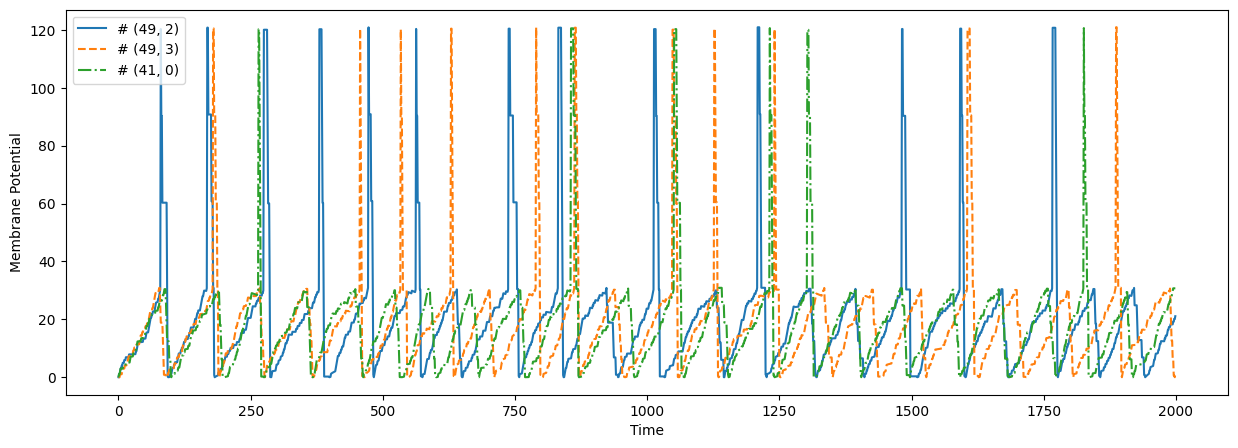

In [9]:
grid_first_walk = random_walk(
    grid_first_sim, STEPS)

plot_grid_cells(
    grid_first_walk,
    [(49, 2), (49, 3), (41, 0)],
    ['-', '--', '-.'])

#### Visualización del mapa de calor
Aquí mostraremos un mapa de calor donde los bloques azules representarán una neurona mostrando una actividad sobre el umbral $L$ (spiking) y, los rojos, representarán una neurona mostrando actividad subumbral.

Si dos bloques son del mismo color, entonces tienen el mismo valor.

> **Observaciones**
>
> Como se observó en la gráfica de la evolución del potencial de membrana, en el mapa de calor se puede apreciar que cuando se producen disparos en las neuronas (azul oscuro) no hay propagación de disparos a las neuronas vecinas (la hay muy baja, realmente).


In [10]:
generate_gif_sequence(
    grid_first_walk, L,
    'grid_first_walk', RESULTS_DIR,
    add_timestamp=False)


100%|██████████| 2000/2000 [01:41<00:00, 19.73it/s]


<Figure size 640x480 with 0 Axes>

<p align='center'><img src='./results/grid_first_walk.gif'></p>

### Rejilla con valores de conductancia intermedios (segunda fila de las imágenes)

Específicamente, $g = 0.06$.


In [11]:
g_second_sim = 0.06

values_dict_second_sim = common_values_dict.copy()

values_dict_second_sim[ParameterEnum.G_1.name] =\
    values_dict_second_sim[ParameterEnum.G_2.name] =\
    values_dict_second_sim[ParameterEnum.G_3.name] =\
    values_dict_second_sim[ParameterEnum.G_4.name] = g_second_sim

grid_second_sim = set_all_cells(
    grid, dict_init_fn, _dict=values_dict_second_sim)

values_dict_second_sim, grid_second_sim


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0,
  'G_1': 0.06,
  'G_2': 0.06,
  'G_3': 0.06,
  'G_4': 0.06},
 array([[[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ...,

#### Visualización del potencial de membrana de algunas unidades

Específicamente visualizaremos las neuronas con los índices:
- `[49, 2]` simbolizando la neurona con índice `2` del artículo (nuestros índices empiezan en la parte superior izquierda del gráfico mostrado anteriormente en la `Figure 3`)
- `[49, 3]` simbolizando la neurona con índice `3`.
- `[41, 0]` simbolizando la neurona con índice `400` (50 neuronas por fila $\rightarrow \frac{400}{50} = 8\text{rows} \rightarrow$ como empezamos desde abajo del todo, $49-8 = 41$ y esto simboliza la primera posición, entonces `[41, 0]`)

> **Observaciones**
>
> Aquí hemos subido ligeramente la conductancia ($g=0,06$). En la gráfica de evolución de potencial en el tiempo se aprecia que las neuronas más próximas (azul y naranja en este caso) llegan a sincronizar la actividad subumbral (y un disparo), pero no ocurre así con las neuronas más alejadas (como la verde).



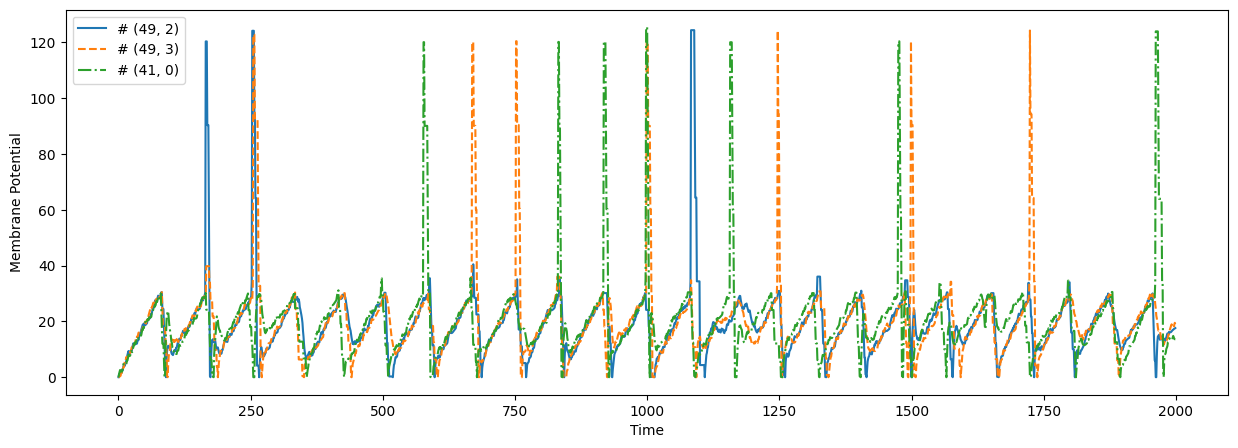

In [12]:
grid_second_walk = random_walk(
    grid_second_sim, STEPS)

plot_grid_cells(
    grid_second_walk,
    [(49, 2), (49, 3), (41, 0)],
    ['-', '--', '-.'])


#### Visualización del mapa de calor
Aquí mostraremos un mapa de calor donde los bloques azules representarán una neurona mostrando una actividad sobre el umbral $L$ (spiking) y, los rojos, representarán una neurona mostrando actividad subumbral.

Si dos bloques son del mismo color, entonces tienen el mismo valor.

> **Observaciones**
>
> En el mapa de calor se puede observar que hay una mayor propagación de disparos que en la [rejilla de neuronas casi aislada](#rejilla-con-neuronas-casi-aisladas-imágenes-de-la-primera-fila).


In [13]:
generate_gif_sequence(
    grid_second_walk, L,
    'grid_second_walk', RESULTS_DIR,
    add_timestamp=False)


100%|██████████| 2000/2000 [01:46<00:00, 18.76it/s]


<Figure size 640x480 with 0 Axes>

<p align='center'><img src='./results/grid_second_walk.gif'></p>

### Rejilla con valores altos de conductancia (tercera fila de imágenes)

Específicamente, $g = 0.17$.


In [14]:
g_third_sim = 0.17

values_dict_third_sim = common_values_dict.copy()

values_dict_third_sim[ParameterEnum.G_1.name] =\
    values_dict_third_sim[ParameterEnum.G_2.name] =\
    values_dict_third_sim[ParameterEnum.G_3.name] =\
    values_dict_third_sim[ParameterEnum.G_4.name] = g_third_sim

grid_third_sim = set_all_cells(
    grid, dict_init_fn, _dict=values_dict_third_sim)

values_dict_third_sim, grid_third_sim


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0,
  'G_1': 0.17,
  'G_2': 0.17,
  'G_3': 0.17,
  'G_4': 0.17},
 array([[[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ...,


#### Visualización del potencial de membrana de algunas unidades

Específicamente visualizaremos las neuronas con los índices:
- `[49, 2]` simbolizando la neurona con índice `2` del artículo (nuestros índices empiezan en la parte superior izquierda del gráfico mostrado anteriormente en la `Figure 3`)
- `[49, 3]` simbolizando la neurona con índice `3`.
- `[41, 0]` simbolizando la neurona con índice `400` (50 neuronas por fila $\rightarrow \frac{400}{50} = 8\text{rows} \rightarrow$ como empezamos desde abajo del todo, $49-8 = 41$ y esto simboliza la primera posición, entonces `[41, 0]`)

> **Observaciones**
>
> Con una conductancia $g=0,17$ se aprecia que la actividad subumbral está bastante sincronizada (con cierto desfase). La actividad de las neuronas (tanto a nivel subumbral como en los disparos) es muy caótica, sobre todo si la comparamos con las que hemos visto hasta ahora.
>
> Lo anterior se debe a la influencia que ejerce la corriente que llega de las neuronas vecinas, que es mayor cuanto más alto es el valor de la conductancia.


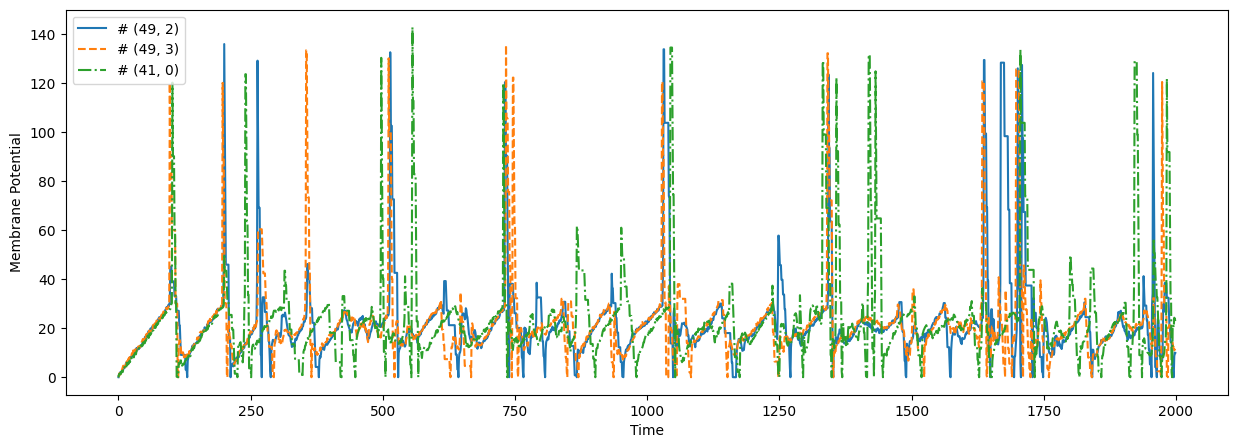

In [15]:
grid_third_walk = random_walk(
    grid_third_sim, STEPS)

plot_grid_cells(
    grid_third_walk,
    [(49, 2), (49, 3), (41, 0)],
    ['-', '--', '-.'])


#### Visualización del mapa de calor
Aquí mostraremos un mapa de calor donde los bloques azules representarán una neurona mostrando una actividad sobre el umbral $L$ (spiking) y, los rojos, representarán una neurona mostrando actividad subumbral.

Si dos bloques son del mismo color, entonces tienen el mismo valor.

> **Observaciones**
>
> Lo que se aprecia en el mapa de calor es que la propagación de los disparos se extiende a una mayor distancia y rapidez que en los dos mapas de calor anteriores gracias a ese valor más alto de la conductancia.



In [16]:
generate_gif_sequence(
    grid_third_walk, L,
    'grid_third_walk', RESULTS_DIR,
    add_timestamp=False)


100%|██████████| 2000/2000 [01:48<00:00, 18.42it/s]


<Figure size 640x480 with 0 Axes>

<p align='center'><img src='./results/grid_third_walk.gif'></p>

### Rejilla con clústeres de estimulación (cuarta fila en las imágenes)
Aquí crearemos un par de clústeres con $6 \times 6$ neuronas con una diferente probabilidad de disparo ($p_f$) ajena a la del resto de neuronas.


Específicamente crearemos dos clústeres ($S_1, S_2$) cuyos puntos de referencia están posicionados en:
- La neurona de referencia del clúster $S_1$ será aquella con el índice: `[36, 11]` representando el índice 661 del artículo (esto es porque cada fila tiene 50 neuronas, entonces, $661 \% 50 = 11 \rightarrow$ sabemos que su columna es la `11` y $661 - 11 = 650 \rightarrow \frac{650}{50} = 13 \rightarrow$ su fila será la `13`. Aunque, como en el artículo comienzan desde la parte superior izquierda y, en nuestra implementación, desde la inferior izquierda $\rightarrow 49-13 = 36$).
- La neurona de referencia del clúster $S_2$ será aquella con el índice: `[12, 37]` representando el índice 1887 del artículo (columna $1887 \% 50 = 37$, y fila $1887 - 37 = 1850 \rightarrow \frac{1850}{50} = 37 \rightarrow 49-37 = 12$)

Tendremos un valor de conductancia común de $g = 0.06$.

La probabilidad de disparo de cada clúster será:
- $p_{f_{S_1}} = 0.8$
- $p_{f_{S_2}} = 0.8$

In [17]:
g_fourth_sim = 0.06

values_dict_fourth_sim = common_values_dict.copy()

values_dict_fourth_sim[ParameterEnum.G_1.name] =\
    values_dict_fourth_sim[ParameterEnum.G_2.name] =\
    values_dict_fourth_sim[ParameterEnum.G_3.name] =\
    values_dict_fourth_sim[ParameterEnum.G_4.name] = g_fourth_sim

grid_fourth_sim = set_all_cells(
    grid, dict_init_fn, _dict=values_dict_fourth_sim)

values_dict_fourth_sim, grid_fourth_sim


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0,
  'G_1': 0.06,
  'G_2': 0.06,
  'G_3': 0.06,
  'G_4': 0.06},
 array([[[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ...,

In [18]:
# We want a 6x6 cluster
S1_fourth_sim_ref = (36, 11)
S1_fourth_sim_vert_ref = (2, 3)
S1_fourth_sim_horiz_ref = (2, 3)
p_f_S1_fourth_sim = 0.8

S1_values_dict_fourth_sim = values_dict_fourth_sim.copy()
S1_values_dict_fourth_sim[ParameterEnum.P_F.name] =\
    1 - p_f_S1_fourth_sim

grid_fourth_sim = create_cluster_with_dict(
    grid_fourth_sim,
    S1_fourth_sim_ref,
    S1_fourth_sim_vert_ref,
    S1_fourth_sim_horiz_ref,
    S1_values_dict_fourth_sim
)

# We want a 6x6 cluster
S2_fourth_sim_ref = (12, 37)
S2_fourth_sim_vert_ref = (3, 2)
S2_fourth_sim_horiz_ref = (2, 3)
p_f_S2_fourth_sim = 0.8

S2_values_dict_fourth_sim = values_dict_fourth_sim.copy()
S2_values_dict_fourth_sim[ParameterEnum.P_F.name] =\
    1 - p_f_S2_fourth_sim

grid_fourth_sim = create_cluster_with_dict(
    grid_fourth_sim, S2_fourth_sim_ref,
    S2_fourth_sim_vert_ref,
    S2_fourth_sim_horiz_ref,
    S2_values_dict_fourth_sim
)


#### Visualización del potencial de membrana de algunas unidades

Específicamente monitorizaremos las neuronas con índices:
- `[45, 0]` simbolizando la neurona con índice `200` en el artículo (columna $200 \% 50 = 0$, y fila $\frac{200}{50} = 4 \rightarrow 49-4 = 45$).
- `[12, 36]` simbolizando la neurona con índice `1886` en el artículo (como ya vimos, el índice 1887 en nuestra implementación será el `[12, 37]`, entonces el índice 1886 sería `[12, 36]`).
- `[12, 37]` simbolizando la neurona con índice `1887` en el artículo.

> **Observaciones**
>
> En esta gráfica las neuronas que producen las señales verde y naranja se encuentran en el mismo cluster, por lo que sincronizarán con mayor facilidad.
>
> La azul, por el contrario, está alejada del cluster y podemos ver que no sincroniza con la misma frecuencia que la naranja y la verde (ni siquiera en la actividad subumbral).


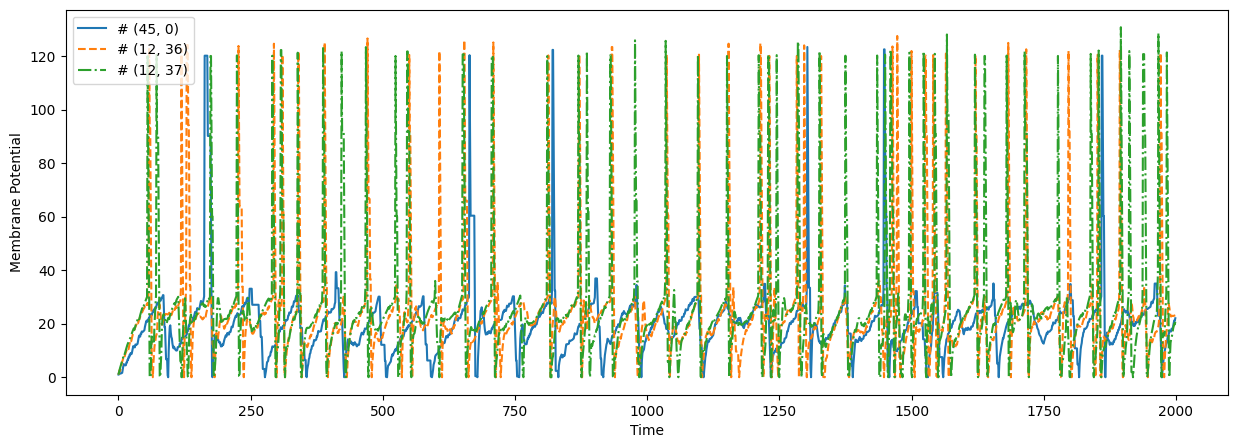

In [19]:
grid_fourth_walk = random_walk(
    grid_fourth_sim, STEPS)

plot_grid_cells(
    grid_fourth_walk,
    [(45, 0), (12, 36), (12, 37)],
    ['-', '--', '-.'])


#### Visualización del mapa de calor
Aquí mostraremos un mapa de calor donde los bloques azules representarán una neurona mostrando una actividad sobre el umbral $L$ (spiking) y, los rojos, representarán una neurona mostrando actividad subumbral.

Si dos bloques son del mismo color, entonces tienen el mismo valor.

> **Observaciones**
>
> Aquí se observa cómo, al comienzo, las neuronas de los dos clusters con una mayor probabilidad de disparo son las que comienzan la generación de pulsos que se extienden al resto de la red.



In [20]:
generate_gif_sequence(
    grid_fourth_walk, L,
    'grid_fourth_walk', RESULTS_DIR,
    add_timestamp=False)


100%|██████████| 2000/2000 [01:48<00:00, 18.40it/s]


<Figure size 640x480 with 0 Axes>

<p align='center'><img src='./results/grid_fourth_walk.gif'></p>

### Rejilla con clústeres de estimulación y sumidero (quinta fila en las imágenes)
Aquí crearemos un par de clústeres con $6 \times 6$ neuronas con una diferente probabilidad de disparo ($p_f$) ajena a la del resto de neuronas. Además, uno de los clústeres será de estimulación ($S_1$) y, el otro, un sumidero ($S_2$).

Específicamente crearemos dos clústeres ($S_1, S_2$) cuyos puntos de referencia están posicionados en:
- La neurona de referencia del clúster $S_1$ será aquella con el índice: `[36, 11]` representando el índice 661 del artículo.
- La neurona de referencia del clúster $S_2$ será aquella con el índice: `[12, 37]` representando el índice 1887 del artículo.

Tendremos un valor de conductancia común de $g = 0.06$.

La probabilidad de disparo de cada clúster será:
- $p_{f_{S_1}} = 0.8$
- $p_{f_{S_2}} = 0.2$

In [21]:
g_fifth_sim = 0.06

values_dict_fifth_sim = common_values_dict.copy()

values_dict_fifth_sim[ParameterEnum.G_1.name] =\
    values_dict_fifth_sim[ParameterEnum.G_2.name] =\
    values_dict_fifth_sim[ParameterEnum.G_3.name] =\
    values_dict_fifth_sim[ParameterEnum.G_4.name] = g_fifth_sim

grid_fifth_sim = set_all_cells(
    grid, dict_init_fn, _dict=values_dict_fifth_sim)

values_dict_fifth_sim, grid_fifth_sim


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0,
  'G_1': 0.06,
  'G_2': 0.06,
  'G_3': 0.06,
  'G_4': 0.06},
 array([[[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ...,

In [22]:
# We want a 6x6 cluster
S1_fifth_sim_ref = (36, 11)
S1_fifth_sim_vert_ref = (2, 3)
S1_fifth_sim_horiz_ref = (2, 3)
p_f_S1_fifth_sim = 0.8

S1_values_dict_fifth_sim = values_dict_fifth_sim.copy()
S1_values_dict_fifth_sim[ParameterEnum.P_F.name] =\
    1 - p_f_S1_fifth_sim

grid_fifth_sim = create_cluster_with_dict(
    grid_fifth_sim,
    S1_fifth_sim_ref,
    S1_fifth_sim_vert_ref,
    S1_fifth_sim_horiz_ref,
    S1_values_dict_fifth_sim
)

# We want a 6x6 cluster
S2_fifth_sim_ref = (12, 37)
S2_fifth_sim_vert_ref = (3, 2)
S2_fifth_sim_horiz_ref = (2, 3)
p_f_S2_fifth_sim = 0.2

S2_values_dict_fifth_sim = values_dict_fifth_sim.copy()
S2_values_dict_fifth_sim[ParameterEnum.P_F.name] =\
    1 - p_f_S2_fifth_sim

grid_fifth_sim = create_cluster_with_dict(
    grid_fifth_sim, S2_fifth_sim_ref,
    S2_fifth_sim_vert_ref,
    S2_fifth_sim_horiz_ref,
    S2_values_dict_fifth_sim
)


#### Visualización del potencial de membrana de algunas unidades

Específicamente monitorizaremos las neuronas con índices:
- `[45, 0]` simbolizando la neurona con índice `200` en el artículo (columna $200 \% 50 = 0$, y fila $\frac{200}{50} = 4 \rightarrow 49-4 = 45$).
- `[36, 11]` simbolizando la neurona con índice `661` en el artículo.
- `[12, 37]` simbolizando la neurona con índice `1887` en el artículo.

> **Observaciones**
>
> Aquí la neurona que se corresponde con la línea naranja tiene una probabilidad de disparo mucho más alta que las otras dos, con lo que dispara muchas más veces.
>
> Por lo demás, observamos cierta sincronización (con algo de desfase) entre las neuronas azul y naranja.

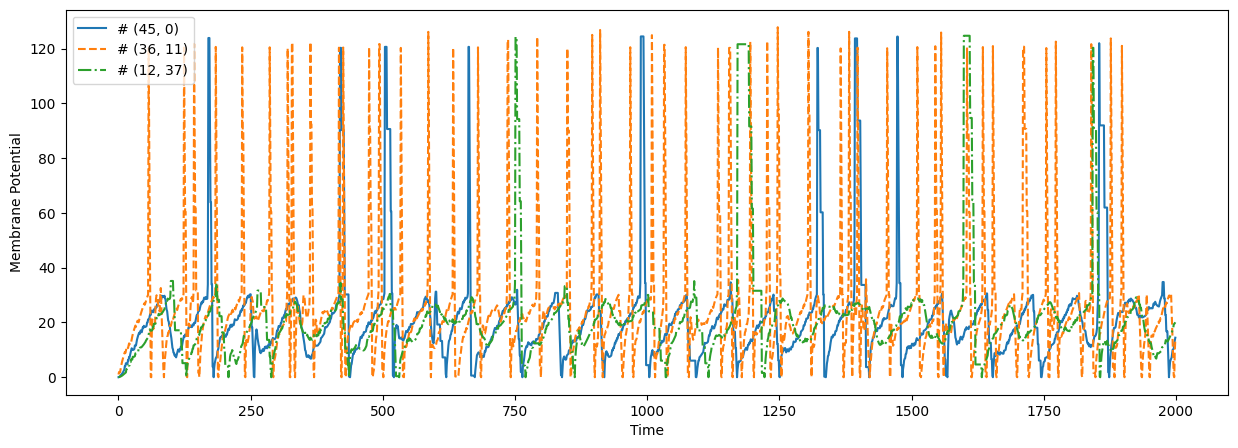

In [23]:
grid_fifth_walk = random_walk(
    grid_fifth_sim, STEPS)

plot_grid_cells(
    grid_fifth_walk,
    [(45, 0), (36, 11), (12, 37)],
    ['-', '--', '-.'])


#### Visualización del mapa de calor
Aquí mostraremos un mapa de calor donde los bloques azules representarán una neurona mostrando una actividad sobre el umbral $L$ (spiking) y, los rojos, representarán una neurona mostrando actividad subumbral.

Si dos bloques son del mismo color, entonces tienen el mismo valor.

> **Observaciones**
>
> En el mapa de calor se puede observar que abajo a la izquierda tenemos un cluster con mayor probabilidad de disparo (fuente) y arriba a la derecha otro cluster con una baja  probabilidad de disparo (sumidero).
>
> Podemos observar cómo se generan las ondas de pulsos en el cluster inferior y cómo van a morir estas ondas al cluster superior.


In [24]:
generate_gif_sequence(
    grid_fifth_walk, L,
    'grid_fifth_walk', RESULTS_DIR,
    add_timestamp=False)


100%|██████████| 2000/2000 [01:49<00:00, 18.22it/s]


<Figure size 640x480 with 0 Axes>

<p align='center'><img src='./results/grid_fifth_walk.gif'></p>

### Rejilla con clústeres de estimulación con mayor y menor probabilidad de disparo (sexta fila en las imágenes)
Aquí crearemos un par de clústeres con $6 \times 6$ neuronas con una diferente probabilidad de disparo ($p_f$) ajena a la del resto de neuronas, pero con $p_f$ diferentes de los mencionados en [Rejilla con clústeres de estimulación](#rejilla-con-clústeres-de-estimulación-cuarta-fila-en-las-imágenes).

Específicamente crearemos dos clústeres ($S_1, S_2$) cuyos puntos de referencia están posicionados en:
- La neurona de referencia del clúster $S_1$ será aquella con el índice: `[36, 11]` representando el índice 661 del artículo.
- La neurona de referencia del clúster $S_2$ será aquella con el índice: `[12, 37]` representando el índice 1887 del artículo.

Tendremos un valor de conductancia común de $g = 0.06$.

La probabilidad de disparo de cada clúster será:
- $p_{f_{S_1}} = 0.9$
- $p_{f_{S_2}} = 0.7$

In [25]:
g_sixth_sim = 0.06

values_dict_sixth_sim = common_values_dict.copy()

values_dict_sixth_sim[ParameterEnum.G_1.name] =\
    values_dict_sixth_sim[ParameterEnum.G_2.name] =\
    values_dict_sixth_sim[ParameterEnum.G_3.name] =\
    values_dict_sixth_sim[ParameterEnum.G_4.name] = g_sixth_sim

grid_sixth_sim = set_all_cells(
    grid, dict_init_fn, _dict=values_dict_sixth_sim)

values_dict_sixth_sim, grid_sixth_sim


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0,
  'G_1': 0.06,
  'G_2': 0.06,
  'G_3': 0.06,
  'G_4': 0.06},
 array([[[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ...,

In [26]:
# We want a 6x6 cluster
S1_sixth_sim_ref = (36, 11)
S1_sixth_sim_vert_ref = (2, 3)
S1_sixth_sim_horiz_ref = (2, 3)
p_f_S1_sixth_sim = 0.9

S1_values_dict_sixth_sim = values_dict_sixth_sim.copy()
S1_values_dict_sixth_sim[ParameterEnum.P_F.name] =\
    1 - p_f_S1_sixth_sim

grid_sixth_sim = create_cluster_with_dict(
    grid_sixth_sim,
    S1_sixth_sim_ref,
    S1_sixth_sim_vert_ref,
    S1_sixth_sim_horiz_ref,
    S1_values_dict_sixth_sim
)

# We want a 6x6 cluster
S2_sixth_sim_ref = (12, 37)
S2_sixth_sim_vert_ref = (3, 2)
S2_sixth_sim_horiz_ref = (2, 3)
p_f_S2_sixth_sim = 0.7

S2_values_dict_sixth_sim = values_dict_sixth_sim.copy()
S2_values_dict_sixth_sim[ParameterEnum.P_F.name] =\
    1 - p_f_S2_sixth_sim

grid_sixth_sim = create_cluster_with_dict(
    grid_sixth_sim, S2_sixth_sim_ref,
    S2_sixth_sim_vert_ref,
    S2_sixth_sim_horiz_ref,
    S2_values_dict_sixth_sim
)


#### Visualización del potencial de membrana de algunas unidades

Específicamente monitorizaremos las neuronas con índices:
- `[45, 0]` simbolizando la neurona con índice `200` en el artículo (columna $200 \% 50 = 0$, y fila $\frac{200}{50} = 4 \rightarrow 49-4 = 45$).
- `[36, 11]` simbolizando la neurona con índice `661` en el artículo.
- `[12, 37]` simbolizando la neurona con índice `1887` en el artículo.

> **Observaciones**
>
> Observamos una mayor sincronización que en la [rejilla con clústeres de estimulación](#rejilla-con-clústeres-de-estimulación-cuarta-fila-en-las-imágenes) lo cual puede deberse a que, a diferencia del caso enlazado anteriormente, al tener en este caso una probabilidad alta aunque distinta ($P_f=0,9 \neq P_f=0,7$) las neuronas de ambos clusters son propensas a disparar, aunque una de ellas (la de probabilidad más baja) dispare con mayor frecuencia cuando le lleguen los estímulos del clúster con probabilidad más alta para terminar sincronizando.
>
> Esto puede deberse a que una de las neuronas de un cluster se encuentre recuperándose de un disparo anterior y, precisamente, al tener como contraparte otro cluster con mayor/menor frequencia de disparo, provoca la llegada de estímulos justo cuando, el primero, ha terminado su recuperación, repitiendo así el ciclo continuamente (lo que da lugar a la sincronización).
>
> Esto a diferencia de la cuarta simulación, en la cual ambos clústers tienen la misma $P_f=0,8$ al que le llegan los impulsos justo cuando se encuentran en hiperpolarización, dificultando así la sincronización de sendos clústeres.



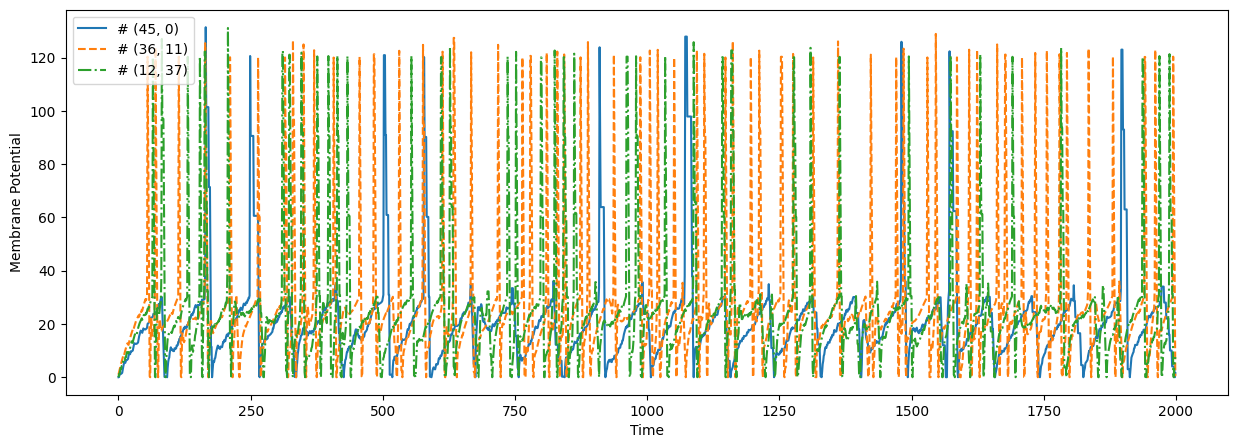

In [27]:
grid_sixth_walk = random_walk(
    grid_sixth_sim, STEPS)

plot_grid_cells(
    grid_sixth_walk,
    [(45, 0), (36, 11), (12, 37)],
    ['-', '--', '-.'])


#### Visualización del mapa de calor
Aquí mostraremos un mapa de calor donde los bloques azules representarán una neurona mostrando una actividad sobre el umbral $L$ (spiking) y, los rojos, representarán una neurona mostrando actividad subumbral.

Si dos bloques son del mismo color, entonces tienen el mismo valor.

> **Observaciones**
>
> Aquí se puede ver cómo las neuronas uno de los clústeres (el inferior izquierdo) dispara con mayor frecuencia que el superior derecha precisamente por ese mayor valor de $p_{f_{S_1}} = 0.9$ que llega al cluster con menor probabilidad de disparo $p_{f_{S_2}} = 0.7$ justo cuando termina de hiperpolarizar.
>
> Podemos observar que en la generación de estos patrones espacio temporales no solo importa la probabilidad de disparo, sino también la distancia entre clusteres y el tiempo de hiperpolarización de las neuronas.



In [28]:
generate_gif_sequence(
    grid_sixth_walk, L,
    'grid_sixth_walk', RESULTS_DIR,
    add_timestamp=False)


100%|██████████| 2000/2000 [01:52<00:00, 17.70it/s]


<Figure size 640x480 with 0 Axes>

<p align='center'><img src='./results/grid_sixth_walk.gif'></p>

# Conclusiones
## Modelo
Para la elaboración de nuestro modelo nos hemos basado en la propuesta de “Stochastic networks with subthreshold oscillations and spiking activity”, este artículo propone modelizar este tipo de comportamiento de forma sencilla, escalable y sin perder la esencia de dicha mecánica subumbral. Evitando así simular el comportamiento real de una neurona de Hodgkin-Huxley, Hindmarsh-Rose o similar, y evitando la necesidad de un alto coste computacional derivado de la simulación de sigmoidales. 

Esto se logra modelizando un caminante aleatorio con una variable aleatoria “C” encargada de encapsular gran parte de la complejidad de la red de neuronas (dicha variable aleatoria se modeliza con un caminante aleatorio con barreras absorbentes).  

Esto tiene todo el sentido puesto que cada neurona tiene una serie de canales iónicos que podrían tener diferentes conductancias, formas, comportamientos, etc, en lo que a las conexiones entre neuronas se refiere y, también, al propio entorno en el que están dispuestas.  

Por lo que parece razonable utilizar modelos estocásticos como el propuesto en el artículo para encapsular toda esa complejidad con variables aleatorias que nos permitan estudiar un comportamiento más genérico de dichos sistemas ya que, modelar con un sistema exacto las neuronas con todas las conexiones, supondría un coste computacional inabarcable.  

Además, para simular esta red neuronal, se ha utilizado una rejilla circular dado que, de no haber conectado los bordes, estos desarrollarían una actividad más lenta en comparación con la actividad vista en las simulaciones y, además, la propagación de los patrones "moriría" en dichos bordes actuando como un pseudo-sumidero. 

Tras implementar dicha propuesta podemos observar que esta estocasticidad añadida permite al sistema un amplio abanico de grados de libertad, lo que fomenta su alta variabilidad en comportamientos que caracterizan a este tipo de sistemas en la realidad y logrando replicar patrones que se forman en redes acopladas eléctricamente en la mayoría de sus conexiones.  

Estos patrones son formados variando la conductancia entre las conexiones de la red y creando una serie de clústeres con diferentes probabilidades de disparo. La cantidad de comportamientos a modelar es prácticamente ilimitada y sin utilizar muchos recursos computacionales.  

Algunos de los patrones observados son:  

- El nulo acoplamiento entre las neuronas (con una conductancia muy baja entre las conexiones $g=0.001$):  

    <p align='center'><img src='./results/grid_first_walk.gif'></p>
    <center>Aquí podemos observar cómo las neuronas disparan y entran en hiperpolarización sin tener en cuenta la actividad de sus vecinas.</center>

 

- El alto acoplamiento entre neuronas (con una conductancia alta de $g=0.17$):  

    <p align='center'><img src='./results/grid_third_walk.gif'></p>
 
    <center> Aquí podemos observar como las neuronas cercanas a otras que han disparado previamente, emiten disparos con mayor frecuencia porque las vecinas influyen con mayor intensidad sobre ellas. También podemos observar la formación de patrones que avanzan en el tiempo como si del juego “Game of Life”, del matemático John Conway, se tratara.</center>


## ¿Por qué están ahí las variaciones subumbrales?
Entendemos como actividad subumbral en las neuronas a toda aquella la actividad eléctrica que ocurre en la membrana celular de la neurona en ausencia de estímulos lo suficientemente fuertes como para desencadenar un potencial de acción. 

Esta actividad se define como repetitiva en espacio y tiempo caracterizada con un bajo grado de variabilidad.  Por lo que parece que dicha actividad es característica de algunas neuronas que mantienen el flujo de iones a través de múltiples canales iónicos presentes en la membrana de la neurona.  

En definitiva, parece razonable pensar que la evolución mantuvo este mecanismo a lo largo de la historia en múltiples seres vivos tras descubrir su viabilidad en el aprendizaje de ritmos motores, navegación, entre otras posibles funciones. 

## ¿Cuáles pueden ser las funciones/propósitos de las variaciones subumbrales? 

Ahora expondremos varios de los posibles propósitos/funciones de dicha actividad subumbral. 



### La actividad subumbral como método de sincronización  

La actividad subumbral da lugar a la sincronización (una de las formas de codificación temporal) de toda la red, lo cual es útil a la hora de dar lugar a la regulación de la frecuencia de disparo neuronal y la generación de patrones de actividad neuronal complejos como la coordinación motora. 

Además, la magnitud de la conductancia de acoplamiento eléctrico entre las neuronas y el número de vecinos acoplados eléctricamente afectan en la generación de patrones espaciotemporales y en la generación de spikes. Es decir: 

- Se observa que cuando el acoplamiento es demasiado débil, la actividad de las neuronas es casi independiente y no se forman patrones coherentes. 

- Cuando el acoplamiento es demasiado fuerte, la actividad de la red se vuelve demasiado sincronizada y se pierde la capacidad de generar patrones espaciales. 

- El aumentar la conductancia es similar a aumentar el número de vecinos en la rejilla, es decir, aumentar el número de vecinos acoplados eléctricamente en la rejilla conduce a una mayor sincronización de la actividad neuronal y a la formación de patrones espaciales más coherentes. 

- De no existir dicha actividad subumbral podría dificultarse notablemente las tareas de coordinación y sincronización de la red. 

### La actividad subumbral como discriminante 

La actividad subumbral permite discriminar diferentes estímulos y eventos: 

- Desempeña un papel en la excitabilidad neuronal y la integración de señales sinápticas. 

- Los potenciales subumbrales pueden amplificar o atenuar las señales sinápticas entrantes, lo que afecta la probabilidad de que se produzca un potencial de acción.  

- Las neuronas son capaces de presentar el fenómeno conocido como “resonancia”, esto es que, la neurona va a tener una preferencia a disparar si le llega un estímulo con una frecuencia determinada. 

### La actividad subumbral y la plasticidad neuronal 

La actividad subumbral parece tener un papel importante en la capacidad de las neuronas para cambiar su fuerza sináptica y su conexión en respuesta a estímulos ambientales. Esto condiciona la plasticidad neuronal, que es la capacidad de las neuronas y las redes neuronales para adaptarse a cambios en el entorno o en la actividad neuronal, ya sea a corto o largo plazo. 

La plasticidad neuronal puede ocurrir a varios niveles, desde la sinapsis entre dos neuronas hasta la organización de redes neuronales complejas. Por ejemplo, la plasticidad sináptica puede resultar en cambios en la fuerza y la eficacia de las conexiones sinápticas, lo que afecta la transmisión de señales entre neuronas. 

A largo plazo, la plasticidad neuronal puede provocar cambios en la estructura y la función de las neuronas, como la generación de nuevas sinapsis o la reorganización de la red neuronal. 


### La actividad subumbral como ruptura del bloqueo de fase 

Otra función de esta actividad subumbral es la de incrementar la variabilidad en la comunicación de la red neuronal. La actividad subumbral permite que exista más desfase en la activación de las neuronas, de lo contrario, se produciría un bloqueo de fase que provocaría que siempre se generen los mismos patrones de disparo en la red de la oliva.  

Esta actividad subumbral puede ser encontrada también en el hipocampo, el “entorhinal cortex” o la ya mencionada oliva inferior y, las dos primeras, son regiones del cerebro muy relacionadas con la navegación espacial, la memoria y la orientación. Por lo que otra posible aplicación de esta actividad podría ser el mantenimiento o generación de “memorias” o, incluso, brindar memoria espacial y un sentido de la orientación a los seres vivos que los contienen.  

Un ejemplo de lo anterior son las denominadas “place cells” que disparan exclusivamente en los “place fields” que son zonas que las “place cells” reconocen y donde emiten una mayor cantidad de spikes (lo que podrían ser puntos de referencia que los animales reconocen y les sirve para orientarse).

Esto podemos observarlo en la siguiente imagen, donde un roedor se encuentra recorriendo un laberinto donde se está monitorizando la actividad de estas “place cells” las cuales solo disparan con mayor incidencia en el “place field” (en negro el recorrido y, en rojo los disparos de las “place cells”).
    <p align='center'><img src='imgs/Place cell firing of a rat in a enclosure.png'></p>
    <center>Extraído de [Wikipedia - Place Cell](https://en.wikipedia.org/wiki/Place_cell)</center>

También es característica esta actividad subumbral en neuronas denominadas “grid cells” caracterizadas por disparar en una estructura con forma de rejilla a la hora de recorrer diferentes espacios.

Un ejemplo de esto es la siguiente imagen extraída de *Stochastic Networks with Subthreshold Oscillations and Spiking Activity* (que a partir de ahora llamaremos BurgessC2011), la cual simula un ser vivo recorriendo un laberinto mientras se monitorizan las dichas “grid cells”: (en negro el camino recorrido por el ser vivo y, en rojo, los disparos de las “grid cells” y, a la derecha, un mapa de calor con los disparos)
    <p align='center'><img src='imgs/Trajectory of the animal in the enclosure while grid cells fire.png'></p>
    <center>Extraído de BurgessC2011</center>

Esto podría también ser un indicador de la distancia recorrida por el ser vivo, su velocidad e incluso su posición en el espacio, facilitando así la autoorganización de la orientación de los seres vivos en “mapas mentales” orquestados por estas “grid cells” y “place cells”.  

Continuando con el punto anterior, también se menciona en BurgessC2011 que esta actividad subumbral presente en las “grid cells” y “place cells” puede aumentar/disminuir su frecuencia de oscilación (la cual está regida por la banda theta, altamente relacionada con el aprendizaje y la memoria, del sujeto la cual varía entre los 6-10Hz en ratas adultas).  

Lo anterior podría ser un indicador de cambio de estado en la integración del potencial de membrana de varias neuronas. Por ejemplo, si tenemos dos neuronas oscilando a 1Hz y, de repente, una de ellas aumenta su frecuencia de oscilación a 1.1Hz, esto supondría un cambio (que podría ser puntual en el tiempo si vuelve a disminuir a 1Hz) en la integración de ambas oscilaciones provocando un cambio de estado en el sistema final como se observa en la siguiente figura: (ambas ondas azules oscilan con 1Hz y, la segunda empieza a oscilar con 1.1Hz desde la vertical verde hasta la roja para volver a oscilar con 1 Hz, la serie verde es la integración de ambas ondas azules)  
    <p align='center'><img src='imgs/BurgessC2011 Information integration based on frequency variation.png'></p>
    <center>Extraído de BurgessC2011</center>

Y el patrón anterior (que podría simbolizar solo la mecánica subumbral sin spikes) también podría hacerse cíclico dando lugar a este cambio de estados a unos “cíclico-temporales”: (las señales a integrar son la azul y roja, el resultado se encuentra en la verde. Se observa cómo, periódicamente, cambia la frecuencia de oscilación de, únicamente la serie roja)  
    <p align='center'><img src='imgs/BurgessC2011 Cyclic information integration system.png'></p>
    <center>Extraído de BurgessC2011</center>


Estos cambios en las frecuencias de oscilación no solo se achacan a la frecuencia de oscilación de la banda theta, sino también a la velocidad (a la hora de correr, andar, …) del propio ser vivo que podría alterar la frecuencia de oscilación subumbral de ciertos clústeres de neuronas para codificar distancias recorridas que, junto a las “place cells” y “grid cells” anteriores, cambiarían los patrones espaciotemporales vistos en las dos figuras anteriores.  

Este comportamiento es denominado como “Velocity Controlled Oscillators” (que toman la velocidad del ser vivo como moduladores de la frecuencia subumbral) los cuales pueden ser simulados por “Membrane Potential Oscillators” con umbrales adecuados que son, en cierta medida, los simulados en esta práctica.  

## Trabajo futuro 

Como trabajo pendiente en nuestro modelo ha quedado el agregar un mayor número de vecinos a cada neurona. Aunque, deducimos que el comportamiento esperable es que, a mayor número de vecinos, mayor influencia en el potencial de membrana. 

Otras alternativas interesantes a estudiar en un futuro podría ser agregar complejidad a la función que utilizamos como caminante aleatorio. Añadiendo un sumatorio adicional en forma de una variable aleatoria de Markov que dependa de dos variables $\alpha, \beta$ para simular la caracterización de organización espacial de las neuronas.  

En esta misma línea, también habría podido ser interesante utilizar un grafo en lugar de una rejilla bi-dimensional, ya que se aproximaría más a la estructura morfológica que adquieren las redes neuronales biológicas en la realidad.  